## Introduction 

The aim of this lab experience is to explore **K-means clustering** in a computing environment. 


We will use the `Iris` flower dataset once again. The `Iris` flower fataset is a classic dataset used for identifying types of flowers based on features describing their petals and sepals. 


After loading the dataset, we will extract two of the attributes and will run the K-means algorithm.

##Libraries used
The libraries we will be using are:


*   Scikit-Learn
*   Pandas
*   Matplotlib
*   Seaborn
*   Numpy
*   Scipy
<br/> One more module called "Kneed" will also be used for determing the "K" value using Elbow Method.





In [21]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### The dataset
Let's import and load the IRIS dataset. We will also print the description of the iris dataset.

In [22]:
data = pd.read_csv("/content/IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


According to the description, the dataset consists of samples described by four numeric predictor attributes (`sepal length`, `sepal width`, `petal length`, `petal width`, in centimeters) plus a label which can take on three discrete values (`Iris-Setosa`, `Iris-Versicolour` and `Iris-Virginica`).

We will only work with the first two attributes (`sepal length`, `sepal width`), which will be stored in a variable `X`. **In this lab we DO NOT need the label, as we are not classifying them.**

Now, let's extract the feature columns only. Here, we are not using the term "predictor" for the datapoints because we are not expecting any predictive output, rather the datapoints will be grouped together in the most appropriate cluster(s).

Also, for now, we will only be considering and extracting first two features, sepal length and sepal width.

In [ ]:
kmeans_data = data.iloc[:,:2]
kmeans_data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Let's take the predictor values into an array:

In [ ]:
features_value = kmeans_data.values
features_value

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

##Choosing the value of "K" for K-Means Clustering

Before applying the K-means algorithm we need to decide how many clusters we want to create. How do we choose this value? 
<br/>In the following cell, we will import KMeans from Scikit-Learn. Then, for each value of K from 1 to 11, we will train the K-means model with the dataset and find out the *scattering* of the clusters for each value of K.

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
inertia = []
K = range(1,11)
distortions = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(distance.cdist(features_value, km.cluster_centers_, 'euclidean'),axis=1)) /
    features_value.shape[0])

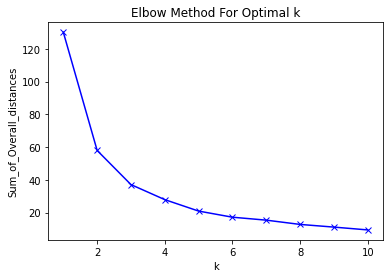

In [ ]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above plot, we can see that, for increasing values of K, we get lower values of the `Sum of Overall Distances` between centroids and the datapoints in the clusters. However, the rate at which this quantity decreases also decreases with higher values of K. In other words, we see the largest decrease of that quantity between `K=1` and `K=2` and then the second largest drop is between `K=2` and `K=3`. Afterwards, the further decrease in `K` has ever so smaller impact on the `Sum of Overall Distances`. Hence, we identify `K=3` as the **elbow point**.  
We can do this programmaticallyas well but we will need to install the "Kneed" package/module to identify the elbow point "K" value, even though it's quite understandable from the plotting above.

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

3

Let's now start clustering the values from the IRIS dataset. As we now know, the "K" value is 3, so we will now carry-forward our implementation accordingly.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_value)

Myclusters = kmeans.predict(features_value)
Myclusters 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Don't get confused when you see the `kmeans.predict()` function in the above code block. Certanly it's not a supervised learning technique and we don't have any "Label" data to predict from. But the clusters we are deciding will have the associated datapoints in them. To decide which datapoints belong in which cluster, this `kmeans.predict()` function will be used.

In order to hold the corresponding cluster values for each datapoint/feature, we are adding a new column to the Mycluster array.

In [ ]:
kmeans_data['cluster'] = Myclusters
kmeans_data

,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


Let's now find the final centroids for the clusters, 0, 1 and, 2.

In [ ]:
centers = np.array(kmeans.cluster_centers_)
centers
centroid = pd.DataFrame(centers)
centroid

,0,1
0,5.006000,3.418000
1,6.812766,3.074468
2,5.773585,2.692453


We will now plot the clustered outputs for the features we have used, sepal length and sepal width. The clustered datapoints have been colour coded and the centroids are colured red.

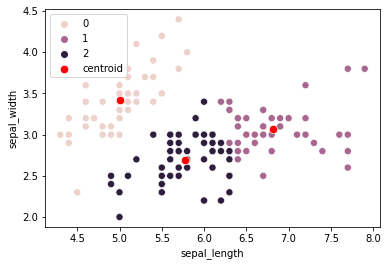

In [ ]:
sns.scatterplot(x = kmeans_data['sepal_length'], y = kmeans_data['sepal_width'], s = 50, c = kmeans_data['cluster'], marker = "o", hue = kmeans_data['cluster'])
sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")

#Question:1
Now, determine the optimal "K" value for the attributes "Petal length" and "Petal width" and also depending on the determined "K" value show the clustered output.

In [27]:
my_kmeans_data = data.iloc[:,2:4]
my_kmeans_data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [29]:
my_features_value = my_kmeans_data.values
my_features_value

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [30]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
inertia = []
K = range(1,11)
distortions = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(my_features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(distance.cdist(my_features_value, km.cluster_centers_, 'euclidean'),axis=1)) /
    my_features_value.shape[0])

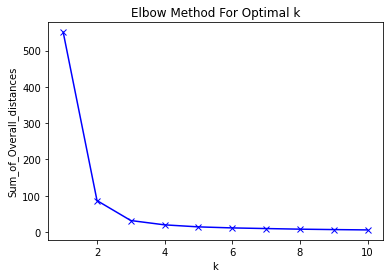

In [31]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

2

In [42]:
my_kmeans = KMeans(n_clusters=3)
my_kmeans.fit(my_features_value)

Myclusters = my_kmeans.predict(my_features_value)
Myclusters 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
my_kmeans_data['cluster'] = Myclusters
my_kmeans_data

,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [35]:
centers = np.array(kmeans.cluster_centers_)
centers
centroid = pd.DataFrame(centers)
centroid

,0,1
0,5.595833,2.037500
1,1.464000,0.244000
2,4.269231,1.342308


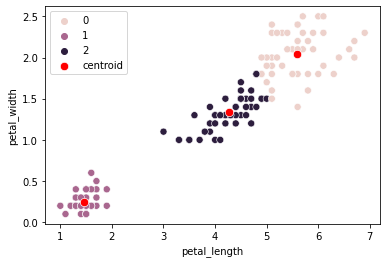

In [45]:
sns.scatterplot(x = my_kmeans_data['petal_length'], y = my_kmeans_data['petal_width'], s = 50, c = my_kmeans_data['cluster'], marker = "o", hue = my_kmeans_data['cluster'])
sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")